A good entry point is here in fastai forum: [
Lesson 9 (part 2) preview](https://forums.fast.ai/t/lesson-9-part-2-preview/101336)

This is not yet part 2 but will be a good playground waiting for it.

# Lesson 9

Video at youtube: https://www.youtube.com/watch?v=_7rMfsA24Ls

There is a repo with notebooks at [github diffusion-nbs](https://github.com/fastai/diffusion-nbs)

[Lexica](https://lexica.art/) is a good starting point where you can search for generated images and what were the prompt used.

To experiment stable diffusion, there are multiple options.

I have cloned lessons repo `git clone https://github.com/fastai/diffusion-nbs.git`

And now I am abble to run this notebook `stable_diffusion.ipynb` which is based on diffusers library from huggingface.

## under WSL

I start from this `fastai_hf` environnement

In [1]:
!cat /home/guillaume/_conda_env/fastai_hf.txt

conda remove --name fastai_hf --all
conda create --name fastai_hf --clone fastai
conda activate fastai_hf
pip install -Uq diffusers transformers fastcore
mamba install ipykernel
python -m ipykernel install --user --name=fastai_hf
mamba install matplotlib
mamba install -c conda-forge ipywidgets


#il faut ajouter les certificats Michelin à certifi
#pour cela lancer ~/bin/certifi.sh
#depuis l'environnement fastai_hf
#et verifier que ça marche en lancant python certify_validation.py

which is a clone of `fastai` environement

In [4]:
!cat /home/guillaume/_conda_env/fastai.txt

mamba create -n fastai python=3.9
conda activate fastai
mamba install pytorch torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia
mamba install -c fastchan fastai nbdev 

For a reason, it fails directly when running `pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16).to("cuda")`

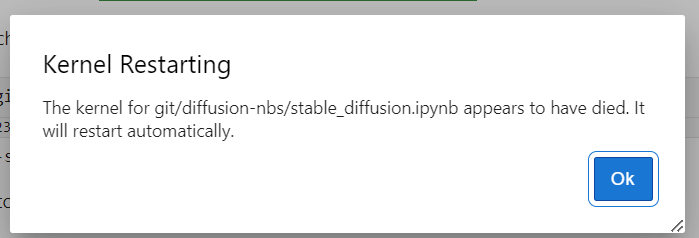

## under linux

As a workaround, I can execute from my full linux box.

But because it has less GPU memory (8 GB), I need to run `pipe.enable_attention_slicing()`  



If your GPU is not big enough to use `pipe`, run `pipe.enable_attention_slicing()`  
As described in the docs:  
> When this option is enabled, the attention module will split the input tensor in slices, to compute attention in several steps. This is useful to save some memory in exchange for a small speed decrease.

In [ ]:
pipe.enable_attention_slicing()

and now it works quite well

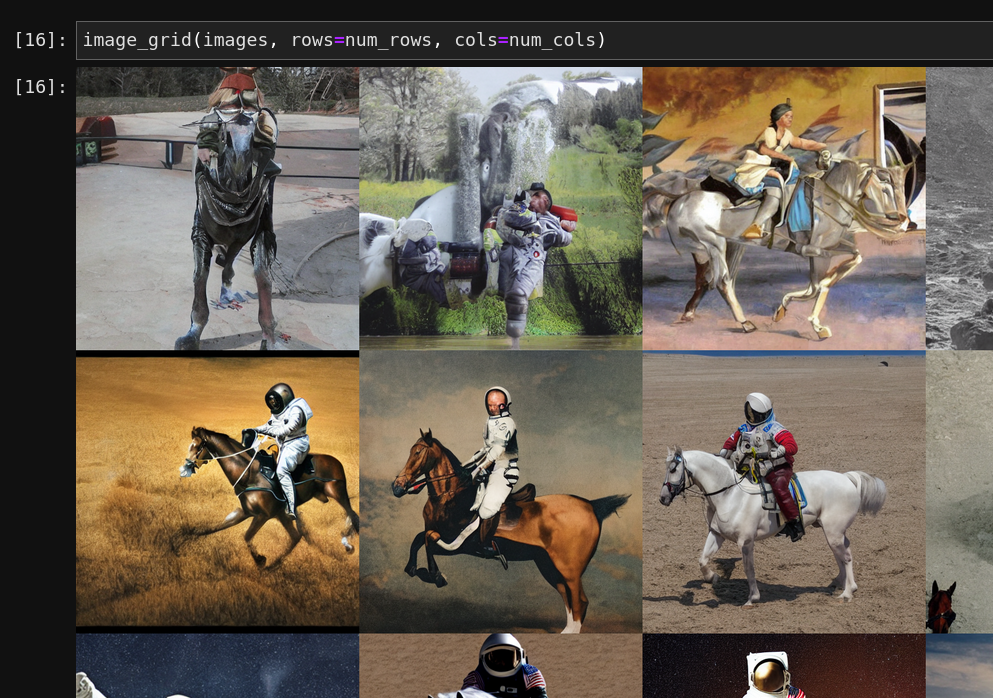

But I don't remember exactly how my fastai environment has been installed. Because I see a reference to fastchan, I guess it was something like `conda install -c fastchan fastai`

In [2]:
!mamba list|grep torch

pytorch                   1.12.1          py3.8_cuda10.2_cudnn7.6.5_0    fastchan
pytorch-mutex             1.0                        cuda    fastchan
torchvision               0.13.1               py38_cu102    fastchan
